In [25]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
import pickle
import os
import glob as gb
import random
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.utils.data_utils import get_file
from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout,Input, Add, Activation, ZeroPadding2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D

In [3]:
# Reading CSV File
df = pd.read_csv('./number_of_samples.csv')
df


,Unnamed: 0,Name of class,Number of files
0,0,bmw serie 1,82
1,1,chevrolet spark,108
2,2,chevroulet aveo,129
3,3,clio,344
4,4,duster,280
5,5,Golf,160
6,6,hyundai i10,130
7,7,hyundai tucson,128
8,8,logan,112
9,9,megane,280


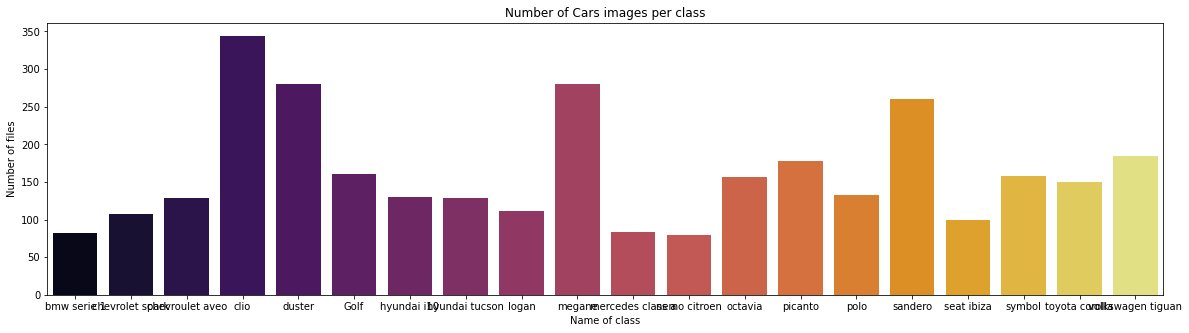

In [4]:
# Number of Cars images per class
plt.figure(figsize=(20,5))
sns.barplot(y = df["Number of files"], x = df["Name of class"],palette = "inferno")
plt.title("Number of Cars images per class")
plt.show()


In [5]:
# Reading image dataset
dataset = './DATA'

In [6]:
# Name of each directory
data = os.listdir(dataset)

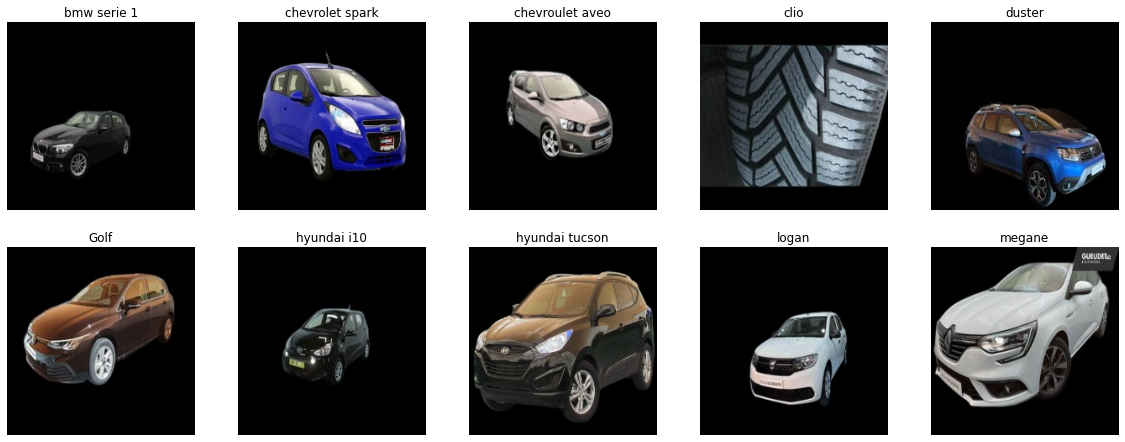

In [7]:
# Generate random sample with title of class to visualise
plt.figure(figsize=(20, 20))
for i in range(10):
    px = plt.subplot(5, 5, i + 1)
    rand = random.randrange(1, 30)                                  
    current_dir = os.listdir(dataset+'/'+str(data[i]))             
    img = cv2.imread(dataset+'/'+str(data[i])+'/'+current_dir[rand])  
    plt.imshow(img )                                               
    plt.title(data[i])                                             
    plt.axis("off")

plt.show()

Input image shape is  (224, 224, 3)


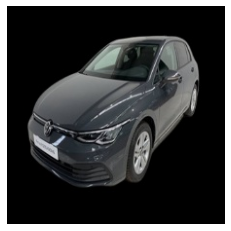

In [8]:
# image size
img_path = r'./DATA/Golf/back473.jpg'
img = plt.imread(img_path)
print ('Input image shape is ',img.shape)
plt.axis('off')
imshow(img)

### *Data Pipeline*

In [9]:
# Create an empty list to store the labels
labels = []

# Define the path to the image directory
image_dir = './DATA'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder
    label = folder
    # Append the label to the labels list
    labels.append(label)

In [10]:
# Create lists to store the filenames and labels
filenames = []
labels = []

# Define the path to the image directory
image_dir = './DATA'

# Get a list of all subdirectories in the image directory
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Iterate through the subdirectories
for folder in folders:
    # Get the name of the folder (label)
    label = folder
    # Get a list of all files in the subdirectory
    folder_path = os.path.join(image_dir, folder)
    files = os.listdir(folder_path)
    # Iterate through the files
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(folder_path, file)
        # Append the file path and label to the lists
        filenames.append(file_path)
        labels.append(label)

In [11]:
# Create a dataframe with the filenames and labels
df = pd.DataFrame({'filename': filenames, 'label': labels})

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
# Create empty lists to store the images and labels
X = []
y = []

# Load the images
for i, row in df.iterrows():
    # Open the image
    img = Image.open(row['filename'])
    # Resize the image
    img = img.resize((224, 224))
    # Convert the image to an array
    img_array = np.array(img)
    # Append the image to the images list
    X.append(img_array)
    # Append the label to the labels list
    y.append(row['label'])

In [13]:
# save the images and labels to a pickle file
file_x = open('./DATA/X.pickle', 'wb')
pickle.dump(X, file_x)
file_x.close()

file_y = open('./DATA/y.pickle', 'wb')
pickle.dump(y, file_y)
file_y.close()

In [14]:
X = pickle.load(open('./DATA/X.pickle', 'rb'))
y = pickle.load(open('./DATA/y.pickle', 'rb'))

In [18]:
# labe encoding the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# One-hot encode the labels
y = to_categorical(y, num_classes=20)

In [19]:
# Reshape the X array
X = np.reshape(X, (len(X), 224, 224, 3))

### *training and testing data*

In [20]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# numbers of each part
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2588, 224, 224, 3)
(2588, 20)
(647, 224, 224, 3)
(647, 20)


### *Data augmentation*

In [22]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
# Create the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(20, activation='softmax'))

In [27]:
# Create the model
model = Sequential()

# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(224, 224, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(20, activation='softmax'))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_18 (Conv2D)          (None, 224, 224, 75)      43275     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 75)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 75)      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 125)     84500     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 125)      0         
 2D)                                                  

In [1]:
# Fit the model on the batches generated by datagen.flow()
model.fit(datagen.flow(X_train, y_train, batch_size=128),
          steps_per_epoch=len(X_train) / 128, epochs=100,
          validation_data = (X_test, y_test))

NameError: name 'model' is not defined

In [2]:
model.fit(X_train, y_train,
          epochs = 5, batch_size = 32, 
          verbose=1, 
          validation_data = (X_test, y_test))

NameError: name 'model' is not defined

In [3]:
# Use the generator to create augmented images
for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
    # Use the augmented images for training
    model.fit(x_batch, y_batch)
    # Break the loop when the generator runs out of images
    if len(X_train) == 0:
        break

NameError: name 'datagen' is not defined

In [ ]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.

    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization( name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization( name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [ ]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut

    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.

    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization (name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization( name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    """
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: to use as image input for the model.
        input_shape: shape of the input
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the last convolutional layer.
        classes:  number of classes to classify images
            into

    """
    
    WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
    WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


    if input_shape == None and input_tensor == None:
        raise ValueError('should enter atleast the shape of the input')
        
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
            img_input = Input(tensor=input_tensor)
            

    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization( name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = AveragePooling2D((7, 7), name='avg_pool')(x)

    if include_top:
        x = Flatten()(x)
        x = Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)


   
    # Create model.
    model = Model(img_input, x, name='resnet50')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    md5_hash='a268eb855778b3df3c7506639542a6af')
    model.load_weights(weights_path)

    return model

In [ ]:
res_model = ResNet50(include_top=False, weights='imagenet',input_shape=(224, 224, 3))

94653016/94653016 [==============================] - 6s 0us/step


In [ ]:
for layer in res_model.layers:
    layer.trainable = False

In [ ]:
last_layer = res_model.get_layer(res_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 1, 1, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2048), dtype=tf.float32, name=None), name='avg_pool/AvgPool:0', description="created by layer 'avg_pool'")


In [ ]:
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_3[0][0]']       
                                )                                                          

In [ ]:
 
res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
res_model.fit(X_train , y_train, verbose=1, epochs=5,
              validation_data = (X_test, y_test))

Epoch 1/5


ValueError: ignored

In [ ]:
x = Flatten()(last_output) 

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

res_model = Model(res_model.input, x)

In [ ]:
# Define the model
model = Model(input_tensor, x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(datagen.flow(X_train, y_train, batch_size=32) epochs=10)

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
height=224
width=224
channels=3
seed=1337
batch_size = 64


# Training generator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(dataset, target_size=(height,width),batch_size=batch_size,
                                                    seed=seed,shuffle=True,class_mode='categorical')

# Testing generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(dataset,target_size=(height,width), batch_size=batch_size,
                                                  seed=seed,shuffle=True,class_mode='categorical')


In [ ]:
training = image_dataset_from_directory(dataset,validation_split=0.2,subset='training',labels='inferred',label_mode='categorical',
    image_size=[224, 224],seed=123,interpolation='nearest',batch_size=64,shuffle=True,)

testing = image_dataset_from_directory(dataset,validation_split=0.2,subset='validation',labels='inferred',label_mode='categorical',
    image_size=[224, 224],seed=123,interpolation='nearest',batch_size=64,shuffle=False,)


In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype= tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
data_train = (training.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

data_test = (testing.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

In [ ]:
data_train

In [ ]:
train_num = train_generator.samples
test_num = test_generator.samples